<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

![alt text](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)
![alt text](https://matplotlib.org/3.3.0/_static/logo2_compressed.svg)



#Introduction to Visualizing Data with Python

 This notebooks and the exercise on it will give you a brief introduction to visualizing  data in Python using [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/) library.

 In this Notebook you will learn:

- How to Visualize  Quantitative Data
- How to Visualize  Qualitative Data
- Basics Data visualizations with seaborn and matplotlib
<br></br>


Most of the notebooks we are going to be using are inspired from existing material that is available online and are made free for educational purposes. Nonetheless, these notebooks should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct](https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).

*The following sections were inspired and uses some of the code and text from the book:

- VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.". [Chapter 4](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb)

- Sam Lau, Joey Gonzalez, and Deb Nolan. (2020). [Principles and Techniques of Data Science](https://www.textbook.ds100.org/intro.html)





###**Instructions:**

- Only modify the code that is within the comments:

`### START CODE HERE ###`

`### END CODE HERE ###`

- You need to run all the code cells on the notebok sequentially
- If you are asked to change/update a cell, change/update and run it to check if your result is correct.


# Data Visualization

Data visualization is an essential tool for data science at every step of analysis, from data cleaning to Exploratory Data Analysis (EDA) to communicating conclusions and predictions. Because human minds are highly developed for visual perception, a well-chosen plot can often reveal trends and anomalies in the data much more efficiently than a textual description.

To effectively use data visualizations, you must be proficient with both the programming tools to generate plots and the principles of visualization. In this notebook we will introduce seaborn and matplotlib, our tools of choice for creating plots in python.


#1-  Visualizing Quantitative Data

We generally use different types of charts to visualize quantitative (numerical) data and qualitative (ordinal or nominal) data. For quantitative data, we most often use **histograms**, **box plots**, and **scatter plots**.
<br><br>

We can use the [seaborn plotting library](http://seaborn.pydata.org/) to create these plots in Python. We will use a dataset containing information about passengers aboard the Titanic.

In [ ]:
# Import seaborn and apply its plotting styles
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
# Load the dataset and drop N/A values to make plot function calls simpler
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
178,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
179,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
180,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


##1.1 - Histograms

We can see that the dataset contains one row for every passenger. Each row includes the age of the passenger and the amount the passenger paid for a ticket. Let's visualize the ages using a histogram. We can use seaborn's `displot` function:

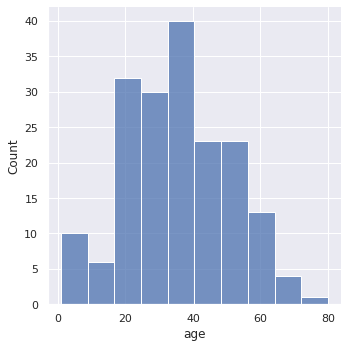

In [ ]:
sns.displot(ti['age'])

Adding a semi-colon `;` at the end tells Jupyter not to output the
usual `<matplotlib.axes._subplots.AxesSubplot>` line. Now try it:

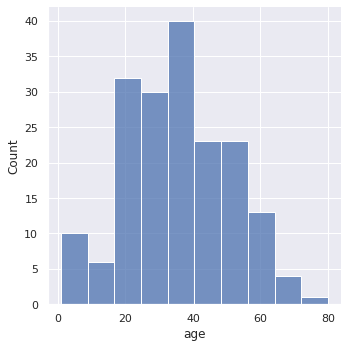

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
sns.displot(ti['age']);
### END CODE HERE ###

We can also add a [rugplot](https://en.wikipedia.org/wiki/Rug_plot) which marks each individual point on the x-axis by just changing one parameter (see the distplot docstring for more details)

In [ ]:
?sns.displot

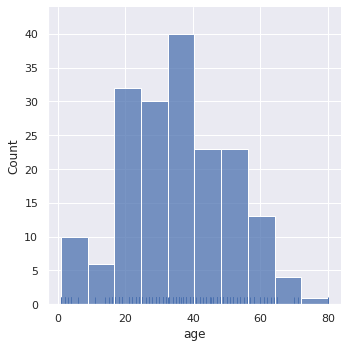

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
sns.displot(ti['age'], rug=True);
### END CODE HERE ###

We can also plot the distribution itself. Adjusting the number of bins shows that there were a number of children on board.

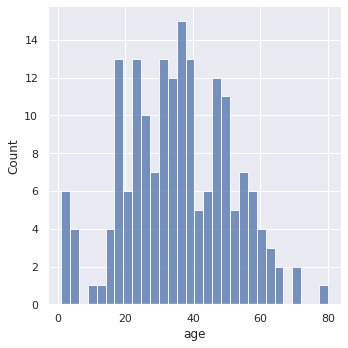

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
sns.displot(ti['age'], bins=30);
### END CODE HERE ###

##1.2 - Box plots

Box plots are a convenient way to see where most of the data lie. Typically, we use the **25th** and **75th percentiles** of the data as the start and endpoints of the box and draw a line within the box for the **50th percentile** (the median). We draw two "whiskers" that extend to show the the remaining data except outliers, which are marked as individual points outside the whiskers.

We can create boxplots using the `boxplot` method

In [ ]:
?sns.boxplot

Create a boxplot fo the attribute *fare*:

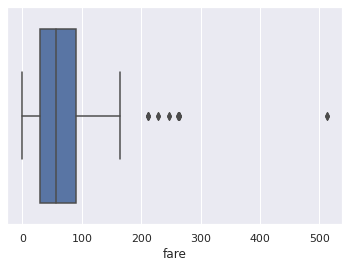

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
sns.boxplot(x=ti['fare']);
### END CODE HERE ###

We typically use the Inter-Quartile Range (IQR) to determine which points are considered outliers for the box plot. The IQR is the difference between the 75th percentile of the data and the 25th percentile

In [ ]:
lower, upper = np.percentile(ti['fare'], [25, 75])
iqr = upper - lower
iqr

60.3

Values greater than 1.5 × IQR above the 75th percentile and less than 1.5 × IQR below the 25th percentile are considered outliers and we can see them marked indivdiually on the boxplot above:

In [ ]:
upper_cutoff = upper + 1.5 * iqr
lower_cutoff = lower - 1.5 * iqr
upper_cutoff, lower_cutoff

(180.45, -60.749999999999986)

Although histograms show the entire distribution at once, box plots are often easier to understand when we split the data by different categories. How can we  make one box plot for each passenger type (i.e., attribute `who`):

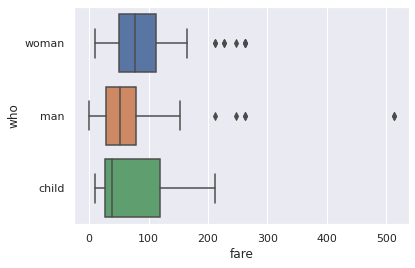

In [ ]:
### START CODE HERE ### (≈ 1 line of code)

### END CODE HERE ###

The separate box plots are much easier to understand than the overlaid histogram below which plots the same data:

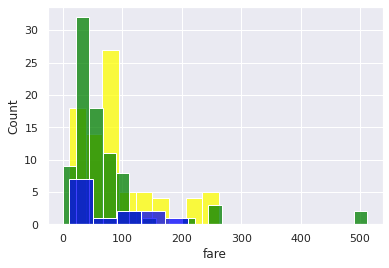

In [ ]:
sns.histplot(ti.loc[ti['who'] == 'woman', 'fare'], color="yellow")
sns.histplot(ti.loc[ti['who'] == 'man', 'fare'], color="green")
sns.histplot(ti.loc[ti['who'] == 'child', 'fare'], color="blue");

##1.3 - Scatter Plots

Scatter plots are used to compare two quantitative variables. We can compare the `age` and `fare` columns of our Titanic dataset using a scatter plot.

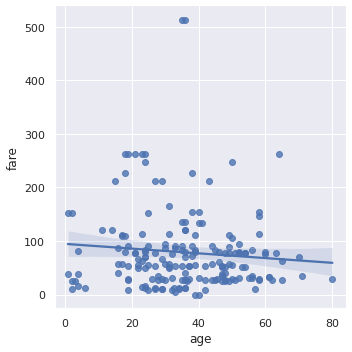

In [ ]:
sns.lmplot(x='age', y='fare', data=ti);

By default seaborn will also fit a regression line to our scatterplot and bootstrap the scatterplot to create a **95% confidence interval** around the regression line shown as the light blue shading around the line above. In this case, the regression line doesn't seem to fit the scatter plot very well so we can turn off the regression.

Look at tge documentation of `sns.lmplot` to identify the parameter that you need to change to remove the regression line

In [ ]:
?sns.lmplot

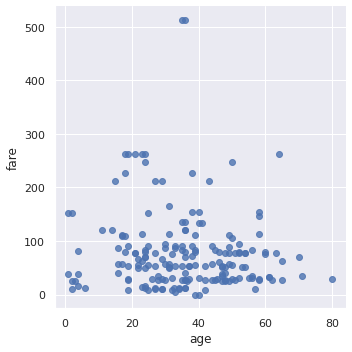

In [ ]:
### START CODE HERE ### (≈ 1 line of code)

### END CODE HERE ###

We can color the points using a categorical variable. Let's use the who column once more:

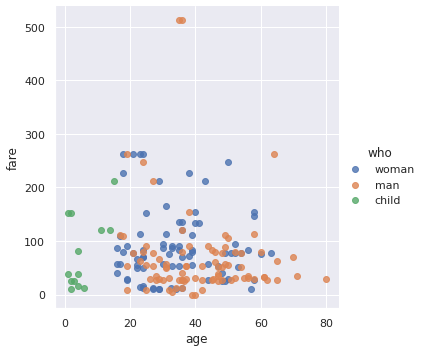

In [ ]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False);

From this plot we can see that all passengers below the age of 18 or so were marked as child. There doesn't seem to be a noticable split between male and female passenger fares, although the two most expensive tickets were purchased by males.

#2-  Visualizing Qualitative Data

For qualitative or categorical data, we most often use **bar charts** and **dot charts**.

##2.1 - Bar Charts

In seaborn, there are two types of bar charts. The first type uses the countplot method to count up the number of times each category appears in a column.

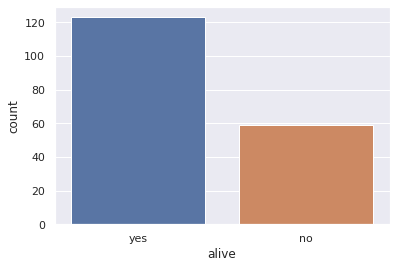

In [ ]:
# Counts how many passengers survived and didn't survive and
# draws bars with corresponding heights
sns.countplot(x='alive', data=ti);

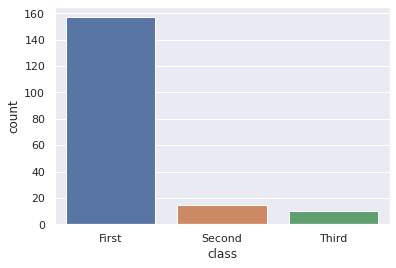

In [ ]:
sns.countplot(x='class', data=ti);

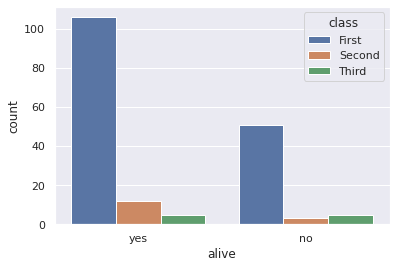

In [ ]:
# As with box plots, we can break down each category further using color
sns.countplot(x='alive', hue='class', data=ti);

The barplot method, on the other hand, groups the DataFrame by a categorical column and plots the height of the bars according to the **average of a numerical column within each group**.

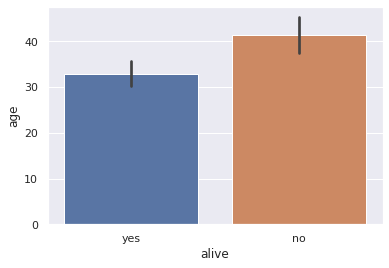

In [ ]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.barplot(x='alive', y='age', data=ti);

The height of each bar can be computed by grouping the original DataFrame and averaging the age column:

In [ ]:
ti[['alive', 'age']].groupby('alive').mean()

,age
alive,
no,41.288136
yes,32.905854


By default, the barplot method will also compute a bootstrap 95% confidence interval for each averaged value, marked as the black lines in the bar chart above. The confidence intervals show that if the dataset contained a random sample of Titanic passengers, the difference between passenger age for those that survived and those that didn't is not statistically significant at the 5% significance level.

These confidence intervals take long to generate when we have larger datasets so it is sometimes useful to turn them off:

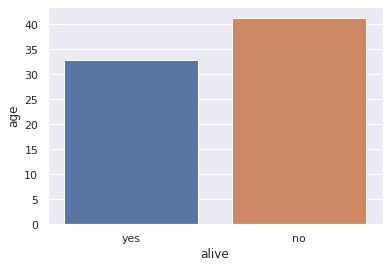

In [ ]:
sns.barplot(x='alive', y='age', data=ti, ci=False);

##2.2 - Dot Charts

Dot charts are similar to bar charts. Instead of plotting bars, dot charts mark a single point at the end of where a bar would go. We use the pointplot method to make dot charts in seaborn. Like the barplot method, the `pointplot` method also automatically groups the DataFrame and computes the average of a separate numerical variable, marking 95% confidence intervals as vertical lines centered on each point.

Create a point plot of the attribute `age` given `alive`:

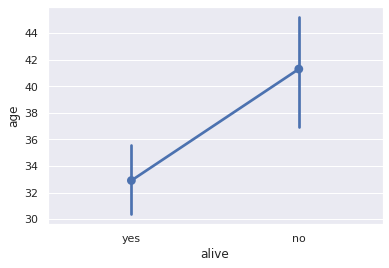

In [ ]:
### START CODE HERE ### (≈ 1 line of code)

### END CODE HERE ###

Dot charts are most useful when comparing changes across categories. Create a point plot of the attribute `survived` given `class`:

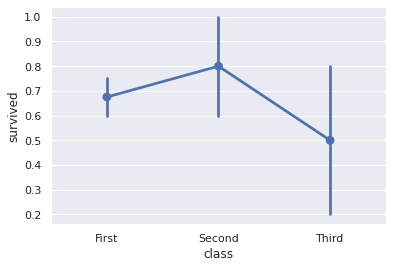

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
# Shows the proportion of survivors for each passenger class

### END CODE HERE ###

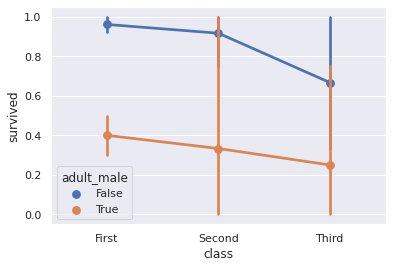

In [ ]:
# Shows the proportion of survivors for each passenger class,
# split by whether the passenger was an adult male
sns.pointplot(x='class', y='survived', hue='adult_male', data=ti);

#3- `matplotlib` for custumizing plots

Although `seaborn` allows us to quickly create many types of plots, it does not give us fine-grained control over the chart. For example, we cannot use `seaborn` to modify a plot's title, change x or y-axis labels, or add annotations to a plot. Instead, we must use the matplotlib library that seaborn is based off of.

`matplotlib` provides basic building blocks for creating plots in Python. Although it gives great control, it is also more verbose—recreating the `seaborn` plots from the previous sections in `matplotlib` would take many lines of code. In fact, we can think of `seaborn` as a set of useful shortcuts to create `matplotlib` plots. Although we prefer to prototype plots in `seaborn`, in order to customize plots for publication we will need to learn basic pieces of `matplotlib`.

Before we look at our first simple example, we must activate matplotlib support in the notebook:

In [ ]:
# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

##3.1 - Customizing Figures and Axe

In order to create a plot in matplotlib, we create a figure, then add an axes to the figure. In matplotlib, an axes is a single chart, and figures can contain multiple axes in a tablular layout. An axes contains marks, the lines or patches drawn on the plot.

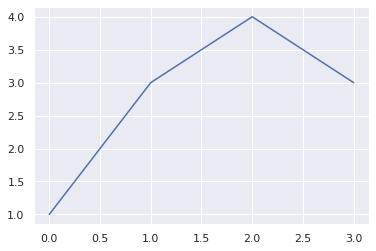

In [ ]:
# Create a figure
f = plt.figure()

# Add an axes to the figure. The second and third arguments create a table
# with 1 row and 1 column. The first argument places the axes in the first
# cell of the table.
ax = f.add_subplot(1, 1, 1)

# Create a line plot on the axes
ax.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot. This will automatically get called in a Jupyter notebook
# so we'll omit it in future cells
plt.show()

To customize the plot, we can use other methods on the axes object:

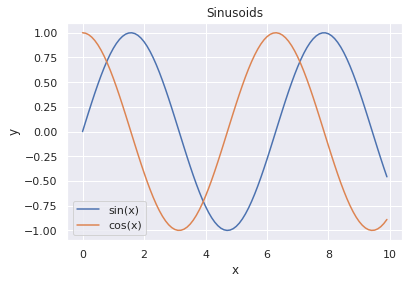

In [ ]:
f = plt.figure()
ax = f.add_subplot(1, 1, 1)

x = np.arange(0, 10, 0.1)

# Setting the label kwarg lets us generate a legend
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend()

ax.set_title('Sinusoids')
ax.set_xlabel('x')
ax.set_ylabel('y');

As a shortcut, matplotlib has plotting methods on the plt module itself that will automatically initialize a figure and axes.

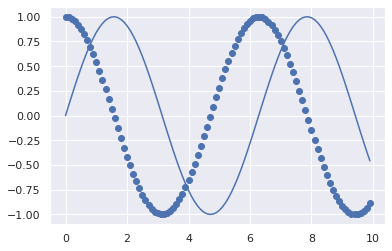

In [ ]:
# Shorthand to create figure and axes and call ax.plot
plt.plot(x, np.sin(x))

# When plt methods are called multiple times in the same cell, the
# existing figure and axes are reused.
plt.scatter(x, np.cos(x));

The plt module has analogous methods to an axes, so we can recreate one of the plots above using plt shorthands.

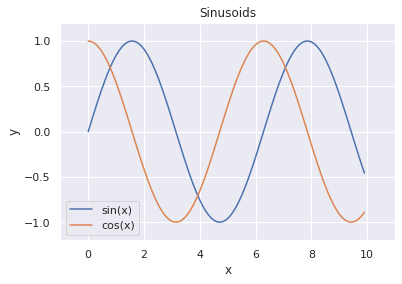

In [ ]:
x = np.arange(0, 10, 0.1)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()

# Shorthand for ax.set_title
plt.title('Sinusoids')
plt.xlabel('x')
plt.ylabel('y')

# Set the x and y-axis limits
plt.xlim(-1, 11)
plt.ylim(-1.2, 1.2);

##3.2 - Customizing Marks

To change properties of the plot marks themselves (e.g. the lines in the plot above), we can pass additional arguments into `plt.plot`

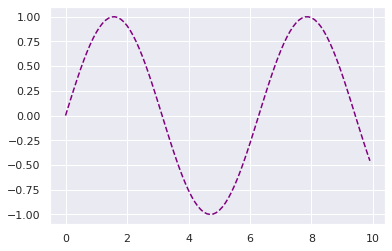

In [ ]:
plt.plot(x, np.sin(x), linestyle='--', color='purple');

Checking the [matplotlib documentation](https://matplotlib.org/3.3.1/contents.html) is the easiest way to figure out which arguments are available for each method.

##3.3 - Aribitrary text and LaTeX support

In matplotlib, text can be added either relative to an individual axis object or to the whole figure.

These commands add text to the Axes:

    set_title() - add a title
    set_xlabel() - add an axis label to the x-axis
    set_ylabel() - add an axis label to the y-axis
    text() - add text at an arbitrary location
    annotate() - add an annotation, with optional arrow

And these act on the whole figure:

    figtext() - add text at an arbitrary location
    suptitle() - add a title

And any text field can contain [LaTeX](https://www.latex-project.org/), expressions for mathematics, as long as they are enclosed in `$` signs. See [cheat sheet](https://wch.github.io/latexsheet/latexsheet-0.png).

This example illustrates all of them:

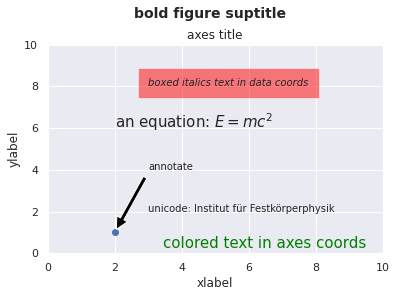

In [ ]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]);

##3.4 - Customizing a `seaborn` plot using `matplotlib`

Now that we've seen how to use matplotlib to customize a plot, we can use the same methods to customize seaborn plots since seaborn creates plots using matplotlib behind-the-scenes.

We'll start with this plot:

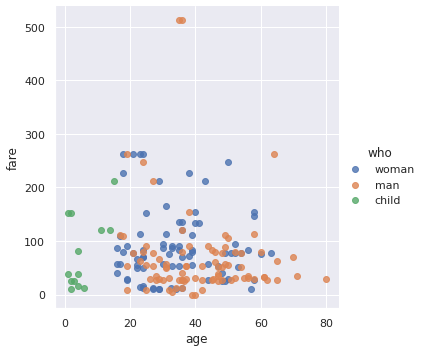

In [ ]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False);

We can see that the plot needs a title and better labels for the x and y-axes. In addition, the two people with the most expensive fares survived, so we can annotate them on our plot.

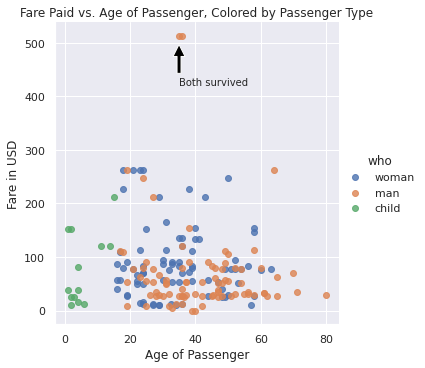

In [ ]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False)

plt.title('Fare Paid vs. Age of Passenger, Colored by Passenger Type')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare in USD')

plt.annotate('Both survived', xy=(35, 500), xytext=(35, 420),
             arrowprops=dict(facecolor='black', shrink=0.05));

In practice, we use seaborn to quickly explore the data and then turn to matplotlib for fine-tuning once we decide on the plots to use in a paper or presentation.

#More about `matplotlib` !!!

### VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.". [Chapter 4](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb)
